In [45]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
data=pd.read_excel('../DATA/AAPLStocks.xlsx',parse_dates=True)
data.drop('Unnamed: 0', axis=1, inplace=True)
#data['date']= pd.to_datetime(data[['Year', 'month','day']])
#data.set_index('date', inplace=True)
#data.drop(['Year', 'month','day'], axis=1,inplace=True)
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,month,day
0,0.147936,0.148888,0.143180,0.147936,146440000,0.0,0,1998,1,26
1,0.146034,0.149839,0.144607,0.145558,112235200,0.0,0,1998,1,27
2,0.146034,0.147461,0.141753,0.146034,151121600,0.0,0,1998,1,28
3,0.144131,0.145558,0.140802,0.140802,211881600,0.0,0,1998,1,29
4,0.139374,0.143655,0.138898,0.139374,162444800,0.0,0,1998,1,30
...,...,...,...,...,...,...,...,...,...,...
6287,134.080002,136.250000,133.770004,135.270004,58280400,0.0,0,2023,1,19
6288,135.279999,138.020004,134.220001,137.869995,79972200,0.0,0,2023,1,20
6289,138.119995,143.320007,137.899994,141.110001,81760300,0.0,0,2023,1,23
6290,140.309998,143.160004,140.300003,142.529999,66435100,0.0,0,2023,1,24


In [47]:

df=data[data['Close']>78]

In [48]:
df=df[['Close','Year','month','day']]

In [49]:
df['date']= pd.to_datetime(data[['Year', 'month','day']],)

In [50]:
df.set_index('date', inplace=True)

In [51]:
df.drop(['Year', 'month','day'], axis=1,inplace=True)

In [52]:
df

,Close
date,
2020-01-17,78.063148
2020-01-23,78.185600
2020-01-29,79.437141
2020-01-30,79.322037
2020-02-04,78.092545
...,...
2023-01-19,135.270004
2023-01-20,137.869995
2023-01-23,141.110001


In [53]:
from statsmodels.tsa.arima.model import ARIMA

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


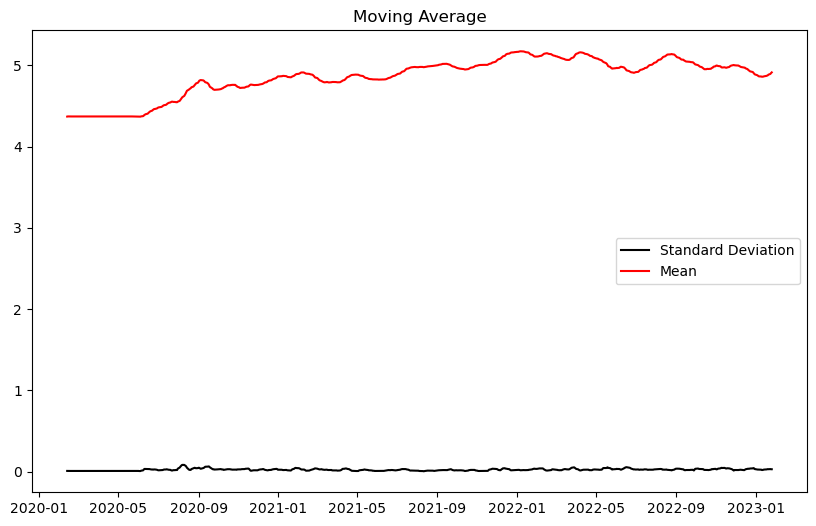

In [118]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df.Close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

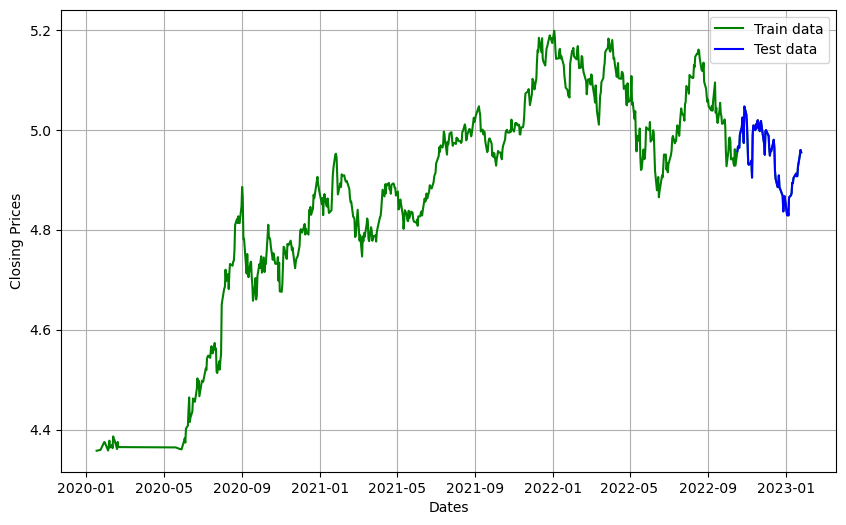

In [119]:
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [12]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import pmdarima as pm

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3074.199, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3073.451, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3073.503, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3074.949, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3071.309, Time=0.58 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.616 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  618
Model:               SARIMAX(0, 1, 0)   Log Likelihood                1538.475
Date:                Sun, 12 Feb 2023   AIC                          -3074.949
Time:                        16:36:08   BIC                          -3070.524
Sample:                             0   HQIC                         -3073.229
                                - 618                                  

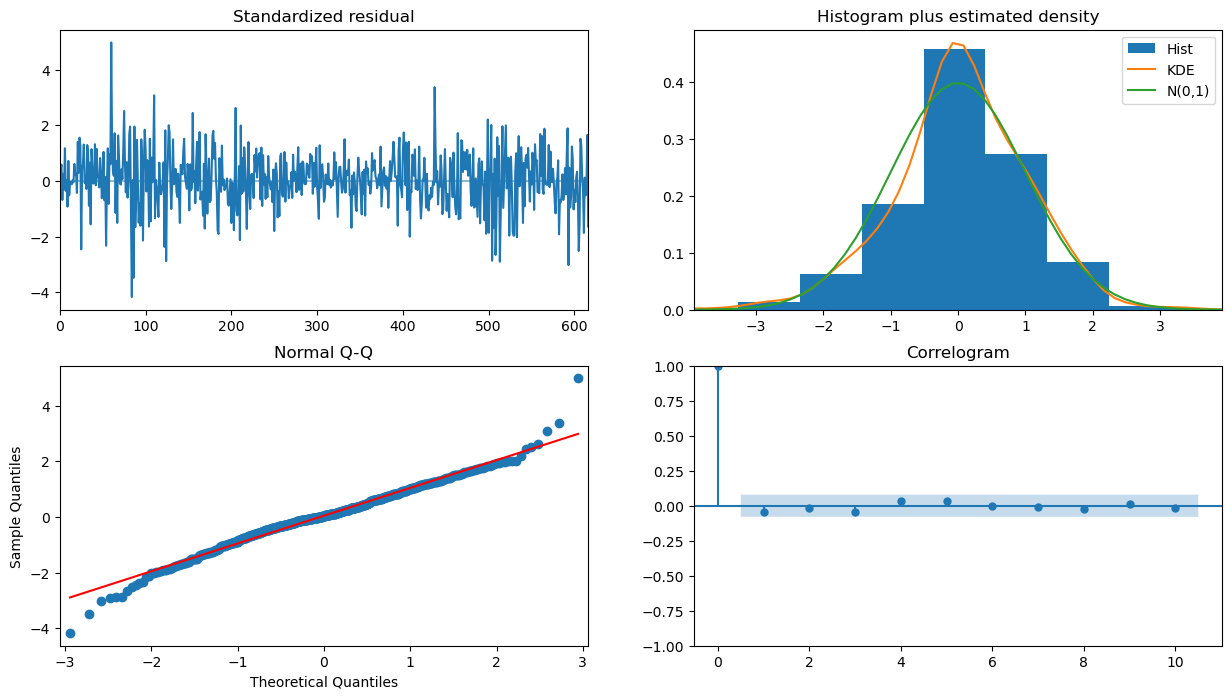

In [13]:
model_autoARIMA = pm.auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [14]:
model = ARIMA(endog=train_data, order=(0,1,0))  
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  618
Model:                 ARIMA(0, 1, 0)   Log Likelihood                1538.475
Date:                Sun, 12 Feb 2023   AIC                          -3074.949
Time:                        16:36:09   BIC                          -3070.524
Sample:                             0   HQIC                         -3073.229
                                - 618                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0004   1.69e-05     23.602      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   1.25   Jarque-Bera (JB):                70.79
Prob(Q):                              0.26   Pr

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [16]:
fc = fitted.predict(6000,alpha=0.05) 
fc= fc.predicted_mean

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


AttributeError: 'Series' object has no attribute 'predicted_mean'

In [ ]:
fc_series = pd.Series(fc, index=test_data.index)

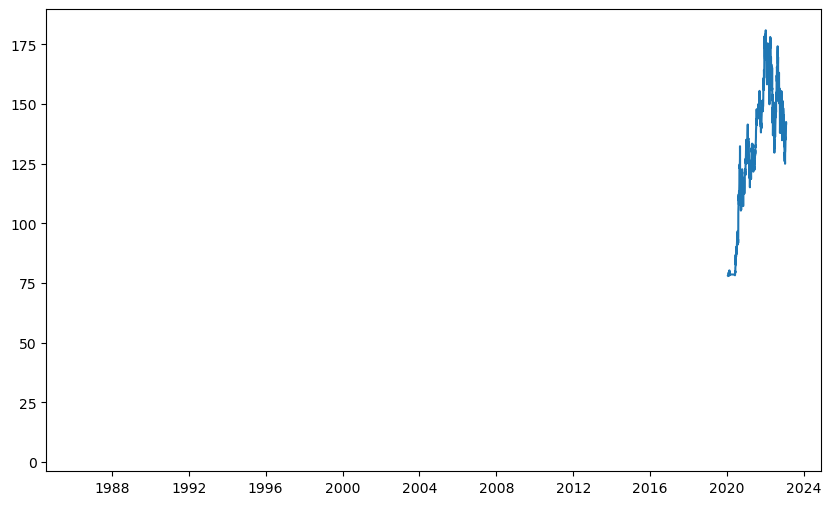

In [17]:
fig,ax=plt.subplots()
ax.plot(df.Close, label='training data')
ax.plot(fc, color = 'blue', label='Actual Stock Price')
#ax.plot(fc, color = 'orange',label='Predicted Stock Price')

In [19]:
df['forecast'] = fitted.predict(start = 60, end= 615, dynamic= True) 

<AxesSubplot:xlabel='date'>

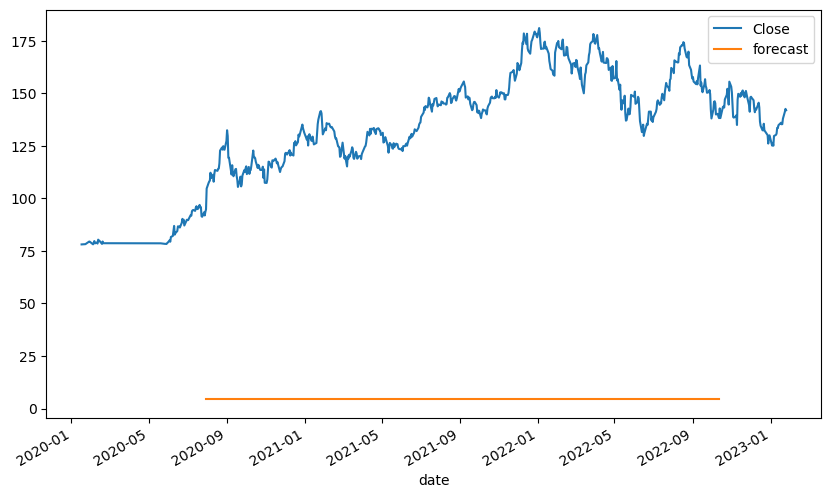

In [20]:
df[['Close','forecast']].plot()

In [ ]:
fc_series = pd.Series(fc, index=test_data.index)

In [ ]:
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')

In [ ]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.title('ARCH CAPITAL GROUP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ARCH CAPITAL GROUP Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
forecast

In [ ]:
forecast = fitted.get_prediction(start=10000, end=20000, dynamic=False)
fc = forecast.predicted_mean
conf = forecast.conf_int(alpha=0.05)

# Plot the time series and the future forecasts
plt.plot(df.Close, label='Time Series Data')
plt.plot(fc, label='Future Forecasts', color='red')
plt.fill_between(conf.index, conf.iloc[:, 0], conf.iloc[:, 1], color='gray', alpha=0.5)
plt.legend()
plt.show()

In [ ]:
import statsmodels.api as sm

In [ ]:
model= sm.tsa.statespace.SARIMAX(train_data, order=(0,1,0), seasonal_order=(0,1,0,12))
results= model.fit()

In [ ]:
model_autoARIMA = pm.auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
forecast = results.get_prediction(freq=1,dynamic=True)
fc = forecast.predicted_mean
conf = forecast.conf_int(alpha=0.05)

In [ ]:


# Plot the time series and the future forecasts
plt.plot(df.Close, label='Time Series Data')
plt.plot(fc, label='Future Forecasts', color='red')
#plt.fill_between(conf.index, conf.iloc[:, 0], conf.iloc[:, 1], color='gray', alpha=0.5)
plt.legend()
plt.show()

In [ ]:
fc.plot()

In [ ]:
n = 69200
forecast = fitted.forecast(n,alpha=0.05)

In [ ]:
fc_series = pd.Series(fc, index=test_data.index)

In [ ]:
# Plot the time series and the future forecasts
plt.plot(df.Close, label='Time Series Data')
plt.plot(forecast, label='Future Forecasts', color='red')
#plt.fill_between(conf.index, conf.iloc[:, 0], conf.iloc[:, 1], color='gray', alpha=0.5)
plt.legend()
plt.show()

In [ ]:
df['forecast'] = results.predict(start = 1, end=600, dynamic= True) 

In [ ]:
df[['Close','forecast']].plot()

In [106]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


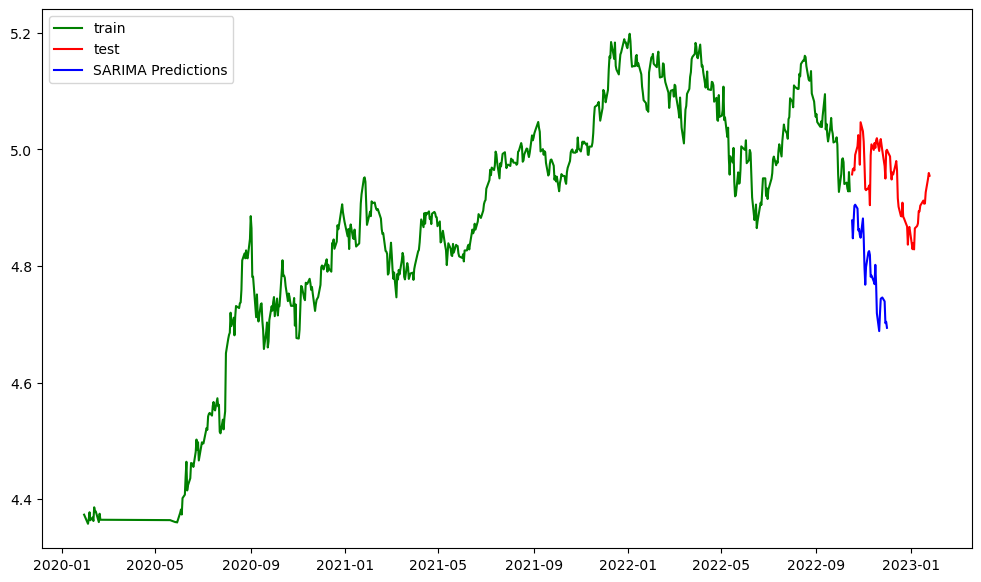

In [121]:
SARIMAXmodel = SARIMAX(train_data, order = (0, 1, 0), seasonal_order=(0,1,0,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test_data.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = 60, end = 650)
y_pred_df.index = test_data.index
y_pred_out = y_pred_df["Predictions"]
plt.figure(figsize=(12,7))
plt.plot(train_data, color = "green", label = 'train')
plt.plot(test_data, color = "red", label = 'test')
plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
plt.legend()

In [62]:
train_data

,Close
date,
2020-01-17,78.063148
2020-01-23,78.185600
2020-01-29,79.437141
2020-01-30,79.322037
2020-02-04,78.092545
...,...
2022-07-01,138.507507
2022-07-05,141.129517
2022-07-06,142.485397


In [74]:
split_index = int(len(df) * 0.8)
train_data = df[:split_index]
test_data = df[split_index:]

In [55]:
train_data

,Close
date,
2020-01-17,78.063148
2020-01-23,78.185600
2020-01-29,79.437141
2020-01-30,79.322037
2020-02-04,78.092545
...,...
2022-07-01,138.507507
2022-07-05,141.129517
2022-07-06,142.485397


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users

RMSE:  13.100502525855168


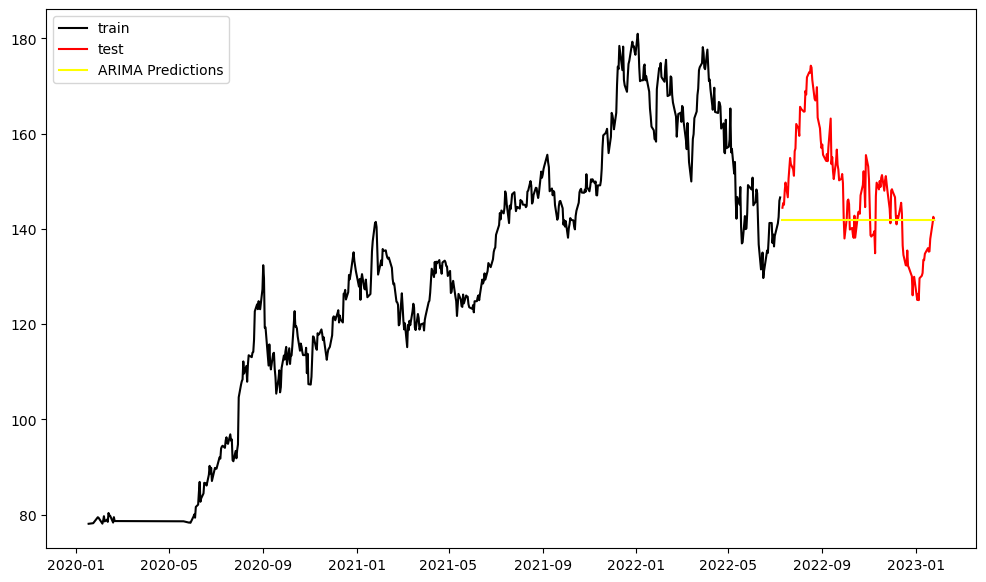

In [116]:
ARIMAmodel = ARIMA(df.Close, order = (0, 1, 0))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test_data.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test_data.index
y_pred_out = y_pred_df["Predictions"] 
plt.figure(figsize=(12,7))
plt.plot(train_data, color = "black", label = 'train')
plt.plot(test_data, color = "red", label = 'test')
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test_data["Close"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

In [117]:
df.Close

date
2020-01-17     78.063148
2020-01-23     78.185600
2020-01-29     79.437141
2020-01-30     79.322037
2020-02-04     78.092545
                 ...    
2023-01-19    135.270004
2023-01-20    137.869995
2023-01-23    141.110001
2023-01-24    142.529999
2023-01-25    141.860001
Name: Close, Length: 690, dtype: float64

In [90]:
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose

In [102]:
result = seasonal_decompose(df, model='multiplicative',period=1)

# Fit the seasonal ARIMA model
model = auto_arima(result.seasonal, seasonal=True, m=12,
                   suppress_warnings=True, stepwise=True, error_action="ignore",
                   trace=True, random_state=42, n_fits=30)

# Print the chosen seasonal ARIMA order
print("The best seasonal ARIMA order is: ", model.order)

 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1960.135, Time=0.02 sec
Total fit time: 0.020 seconds
The best seasonal ARIMA order is:  (0, 0, 0)


C:\Users\User\anaconda3\lib\site-packages\pmdarima\arima\auto.py:444: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


In [88]:
df

,Close
date,
2020-01-17,78.063148
2020-01-23,78.185600
2020-01-29,79.437141
2020-01-30,79.322037
2020-02-04,78.092545
...,...
2023-01-19,135.270004
2023-01-20,137.869995
2023-01-23,141.110001


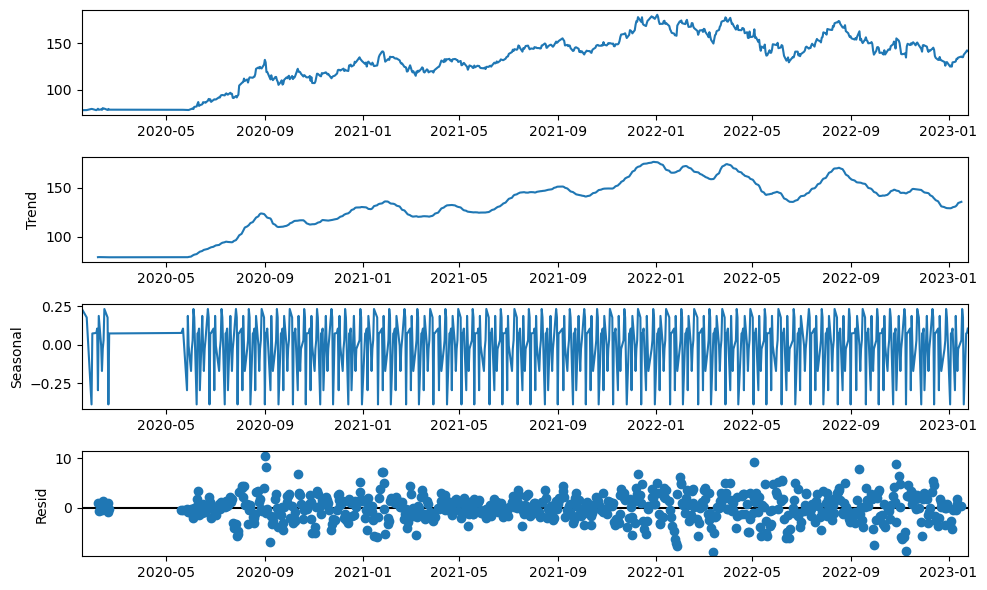

In [95]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(df, model="additive",period=12)
decompose_data.plot();